<a href="https://colab.research.google.com/github/Salohiddinali/Toshkent_Uylari/blob/main/predict_price_of_houses_in_tashkent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![image.png](attachment:a92c16d3-3fd4-4669-addd-094546e52b9d.png)![image.png](attachment:6e87592c-7bc1-47e0-b6a5-a4ae2bcb5e86.png)](http://)

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df_n = df
df_f = df_n.drop(['location', 'district'], axis=1)
for col in list(df_f.columns):
       if type(col) != int:
            df_n[col] = pd.to_numeric(df_f[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7564 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [ ]:
df_n.isna().sum()

,0
location,0
district,0
rooms,0
size,1
level,0
max_levels,0
price,99


In [ ]:
df_n = df_n.dropna()
df_n.isna().sum()

,0
location,0
district,0
rooms,0
size,0
level,0
max_levels,0
price,0


In [ ]:
print(f"max_size : {df_n['size'].max()}   min_size : {df_n['size'].min()}")

max_size : 70000.0   min_size : 1.0


In [ ]:
df_n[df_n['size']<15][df_n['rooms']>1]

<ipython-input-8-2010e26a03e4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n[df_n['size']<15][df_n['rooms']>1]


,location,district,rooms,size,level,max_levels,price
796,"город Ташкент, Яккасарайский район, 1-й проезд...",Яккасарайский,2,5.0,1,4,50000.0
1588,"город Ташкент, Янгихаётский район, Yangi hayot...",Янгихаётский,5,1.0,6,9,45000.0
2147,"город Ташкент, Учтепинский район, Куксарой",Учтепинский,8,8.5,2,2,230000.0
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.0,1,1,50000.0
4053,"город Ташкент, Мирзо-Улугбекский район, Элобод",Мирзо-Улугбекский,2,4.0,1,3,26000.0
4337,"город Ташкент, Мирабадский район, Нукус",Мирабадский,3,5.0,4,5,46600.0
4690,"город Ташкент, Мирабадский район, 1-й проезд Х...",Мирабадский,5,3.8,2,2,90000.0
5496,"город Ташкент, Учтепинский район, Чиланзар 25-...",Учтепинский,2,1.0,2,5,35000.0


In [ ]:
df_n[df_n['size']>250]

,location,district,rooms,size,level,max_levels,price
262,"город Ташкент, Мирабадский район, Нукус",Мирабадский,8,350.0,2,12,260000.0
307,"город Ташкент, Юнусабадский район, ц-5 Киёт (Ц...",Юнусабадский,5,255.0,1,8,270000.0
308,"город Ташкент, Юнусабадский район, ц-5 Киёт (Ц...",Юнусабадский,6,266.0,1,8,285000.0
741,"город Ташкент, Мирабадский район, Айбека (пр-т...",Мирабадский,5,300.0,3,8,425000.0
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.0,2,4,46500.0
1553,"город Ташкент, Мирабадский район, Шахрисабз",Мирабадский,4,280.0,4,8,320000.0
1557,"город Ташкент, Юнусабадский район, Минор",Юнусабадский,10,448.0,7,7,425600.0
1649,"город Ташкент, Шайхантахурский район, Ипакчи",Шайхантахурский,6,268.0,1,3,260000.0
1674,"город Ташкент, Яккасарайский район, Кичик Бешагач",Яккасарайский,3,265.0,1,9,198750.0
1675,"город Ташкент, Мирабадский район, Нукус",Мирабадский,8,350.0,2,12,260000.0


In [ ]:
df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)
df_n = df_n.drop(df_n[df_n['size']>250].index)
df_n = df_n.drop(df_n[df_n['size']==2100].index)

<ipython-input-10-dd9e9b5e3859>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)


In [ ]:
print(f"max_price : {df_n['price'].max()}   min_price : {df_n['price'].min()}")

max_price : 52000000.0   min_price : 2.0


In [ ]:
df_n[df_n['price']<7000][df_n['rooms']>1]

<ipython-input-12-3083a2b11fb6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n[df_n['price']<7000][df_n['rooms']>1]


,location,district,rooms,size,level,max_levels,price
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000.0
3832,"город Ташкент, Яккасарайский район, Абдуллы Ка...",Яккасарайский,4,170.0,2,6,2000.0
5073,"город Ташкент, Сергелийский район, Srrgili 8uc...",Сергелийский,2,54.0,7,7,2864.0
5719,"город Ташкент, Шайхантахурский район, Караташ",Шайхантахурский,7,230.0,2,5,1000.0
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2,51.0,2,4,2.0


In [ ]:
df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)
df_n = df_n.drop(df_n[df_n['price']>200000].index)

<ipython-input-13-316b0a4ee742>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)


In [ ]:
df_n = df_n.reset_index(drop=True)

df_1 = df_n.drop(['location', 'district'], axis=1)

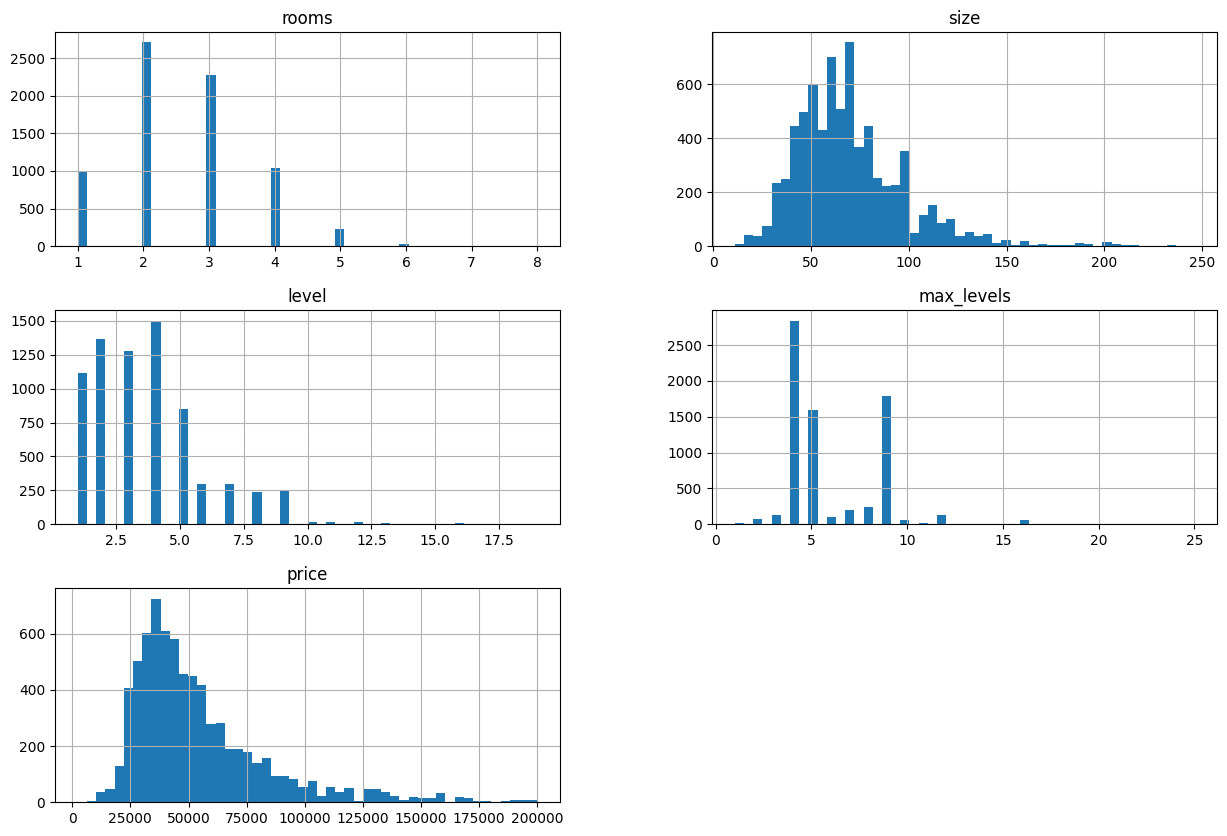

In [ ]:
%matplotlib inline
df_1.hist(bins=50, figsize=(15,10))
plt.show()

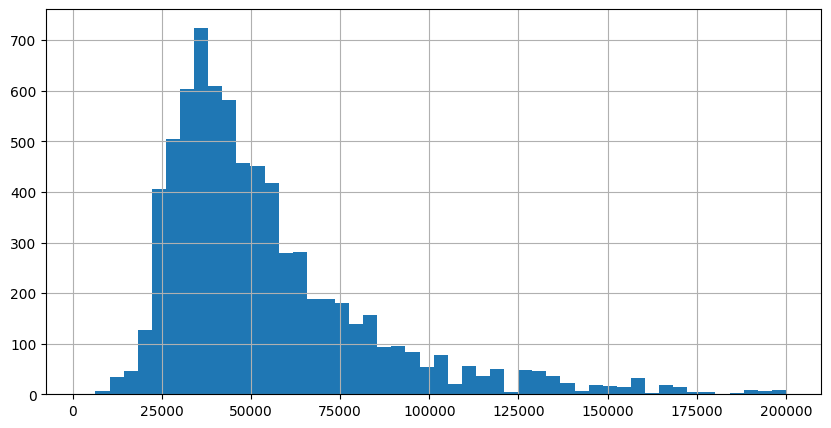

In [ ]:
%matplotlib inline
df_p=df_n[['price']]
df_p['price'].hist(bins=50, figsize=(10,5))
plt.show()

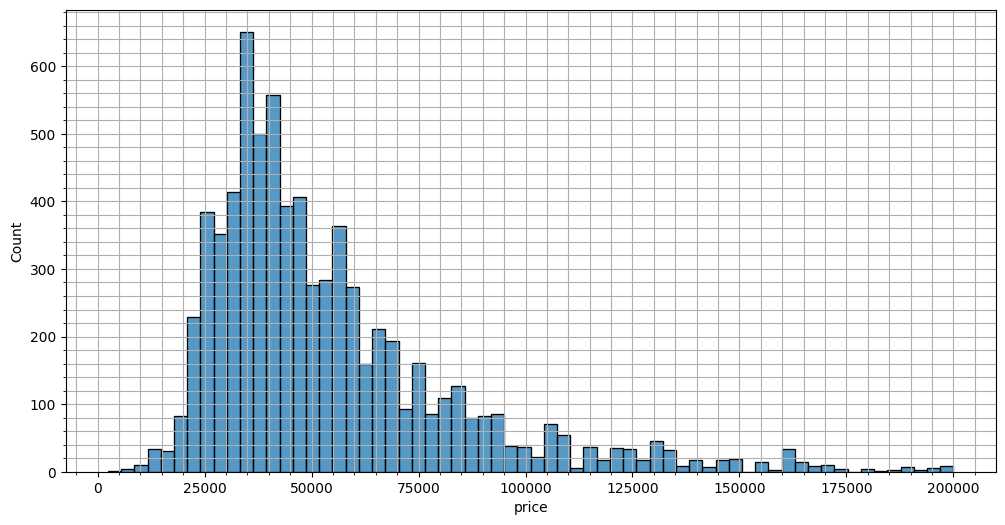

In [ ]:
df_pf=df_n[df_n['price']<250000]
plt.figure(figsize=(12,6))
sns.histplot(data=df_pf, x='price')
plt.grid(which='both')
plt.minorticks_on()
plt.show()

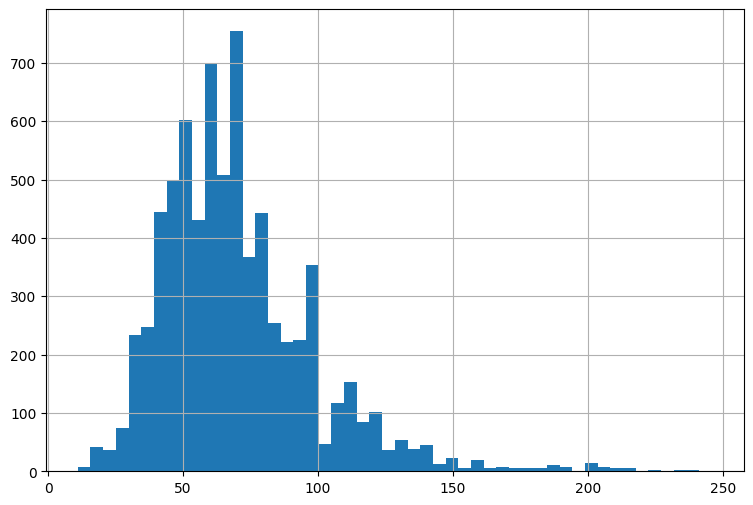

In [ ]:
%matplotlib inline
df_s=df_n[['size']]
df_s['size'].hist(bins=50, figsize=(9,6))
plt.show()

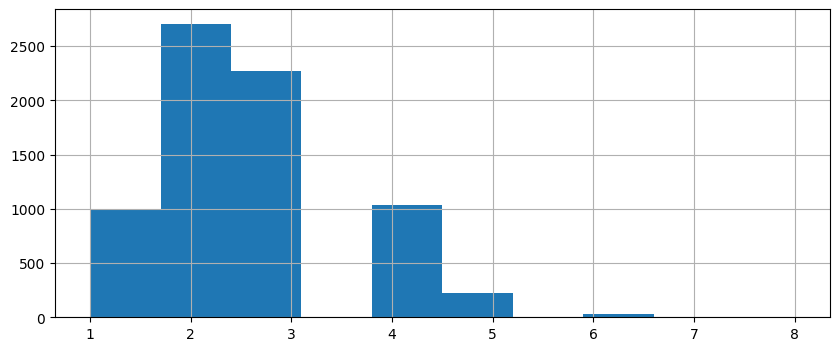

In [ ]:
%matplotlib inline
df_r=df_n[['rooms']]
df_r['rooms'].hist(bins=10, figsize=(10,4))
plt.show()

In [ ]:
df_1.corrwith(df_1['price']).sort_values(ascending=False)

,0
price,1.000000
size,0.787158
rooms,0.603204
max_levels,0.268437
level,0.085466


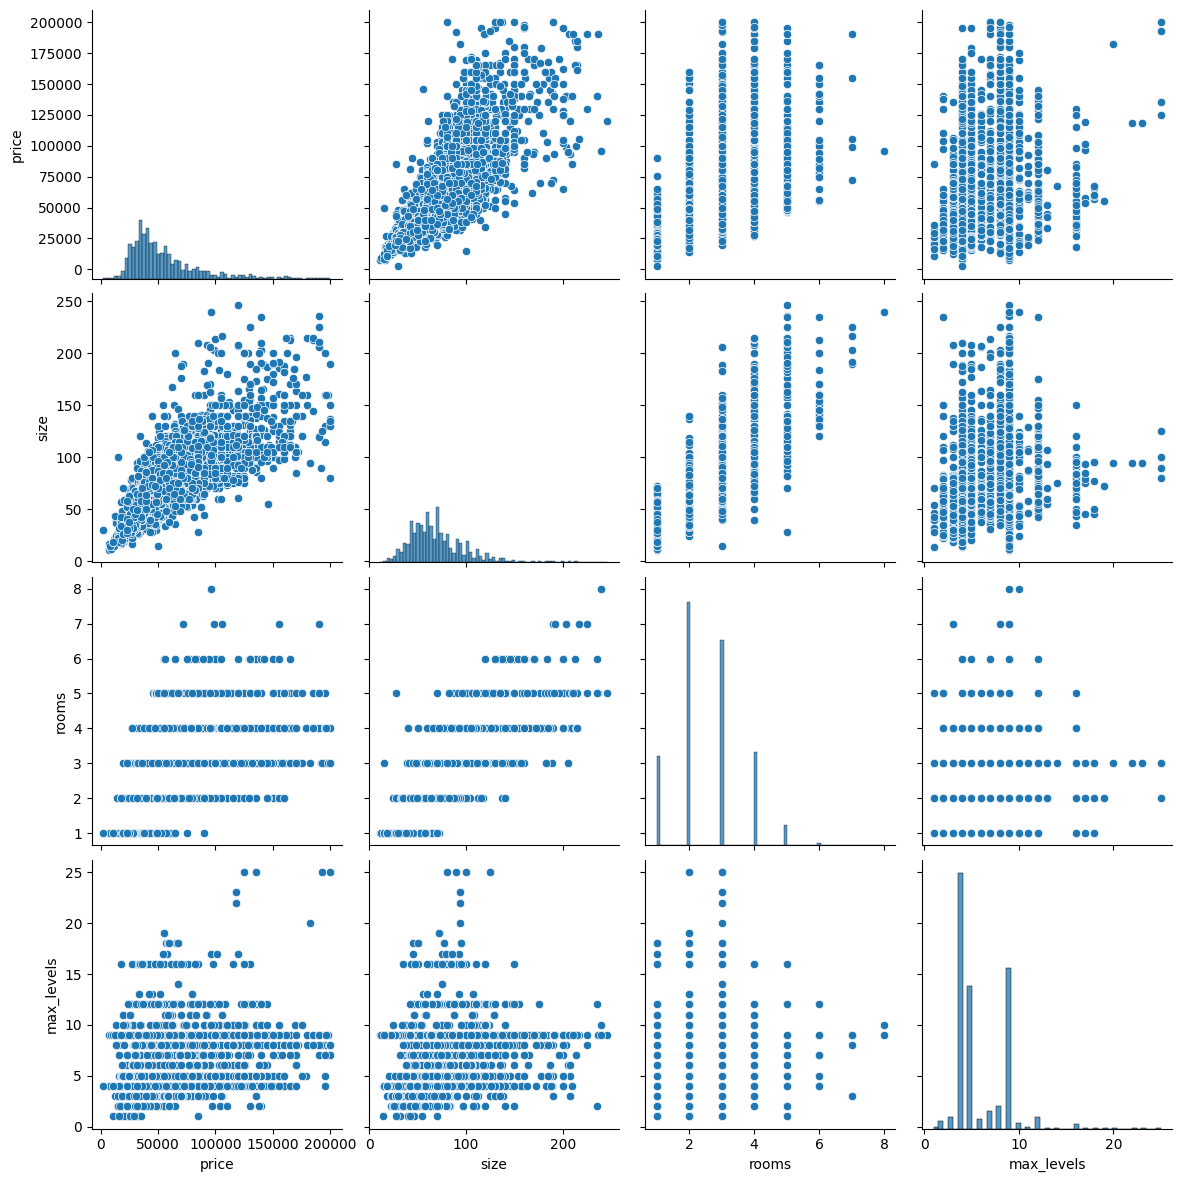

In [ ]:
cols = ['price','size','rooms','max_levels']
sns.pairplot(df_1[cols], height=3)
plt.show()

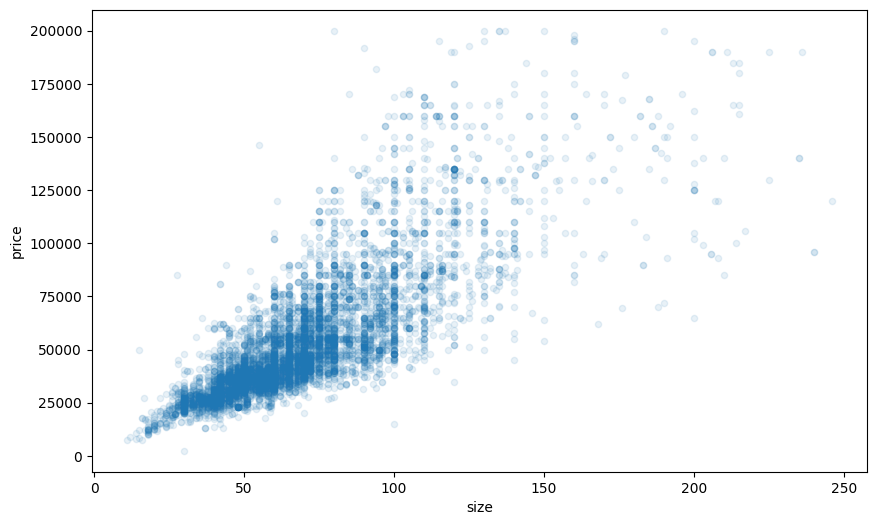

In [ ]:
df_n.plot(kind='scatter', x="size", y="price", alpha=0.1, figsize=(10,6))
plt.show()

Data preparation for ML

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
size_ix, price_ix = 3, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df_n = X.copy()
        df_f = df_n.drop(['location', 'district'], axis=1)
        for col in df_f.columns:
            if df_f[col].dtype == 'object':
                df_n[col] = pd.to_numeric(df_f[col], errors='coerce')
        df_n = df_n.dropna()
        df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)
        df_n = df_n.drop(df_n[df_n['size']>250].index)
        df_n = df_n.drop(df_n[df_n['size']==2100].index)
        df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)
        df_n = df_n.drop(df_n[df_n['price']>200000].index)
        return df_n

combined_adder = CombinedAttributesAdder()

transformed_data = combined_adder.transform(df)

df_n = transformed_data

<ipython-input-24-0567843768dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)
<ipython-input-24-0567843768dd>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_n, test_size=0.2, random_state=42)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

X_num = X_train.drop(["district",'location'], axis=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs)
])

In [ ]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared[0:5,:]

array([[ 1.38904861e+00,  2.26157807e+00,  5.88274615e-01,
        -3.01186764e-03,  9.00000000e+00],
       [-5.51946480e-01, -3.42901073e-01,  1.92633657e+00,
         1.13881335e+00,  2.00000000e+00],
       [-5.51946480e-01, -6.90164959e-01,  1.42253963e-01,
        -7.64228676e-01,  1.10000000e+01],
       [-5.51946480e-01, -1.69269130e-01, -1.19580799e+00,
         1.13881335e+00,  2.00000000e+00],
       [ 1.38904861e+00,  9.07248915e-01,  1.92633657e+00,
         1.13881335e+00,  4.00000000e+00]])

Machine learning

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [ ]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [ ]:
test_data = X_train.sample(5)
test_data

,location,district,rooms,size,level,max_levels
5772,"город Ташкент, Юнусабадский район, Шахристанская",Юнусабадский,4,90.0,2,4
4073,"город Ташкент, Юнусабадский район, Юнусабад 11...",Юнусабадский,4,78.0,1,4
6623,"город Ташкент, Мирзо-Улугбекский район, городс...",Мирзо-Улугбекский,1,33.0,2,4
4060,"город Ташкент, Мирзо-Улугбекский район, Городо...",Мирзо-Улугбекский,2,60.0,6,9
5019,"город Ташкент, Яшнободский район, Мавлоно Риёзи",Яшнободский,3,75.0,6,9


In [ ]:
test_label = y.loc[test_data.index]
test_label

,price
5772,77000.0
4073,52000.0
6623,24000.0
4060,34000.0
5019,45000.0


In [ ]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 1.38904861,  0.69889058, -0.74978734, -0.76422868,  8.        ],
       [ 1.38904861,  0.28217392, -1.19580799, -0.76422868,  8.        ],
       [-1.52244403, -1.28051356, -0.74978734, -0.76422868,  2.        ],
       [-0.55194648, -0.34290107,  1.03429527,  1.13881335,  2.        ],
       [ 0.41855107,  0.17799476,  1.03429527,  1.13881335, 11.        ]])

In [ ]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([66846.65849765, 57581.43370109, 28426.4450257 , 48080.82328851,
       53851.77138953])

In [ ]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
5772,66846.658498,77000.0
4073,57581.433701,52000.0
6623,28426.445026,24000.0
4060,48080.823289,34000.0
5019,53851.771390,45000.0


In [ ]:
test_set

,location,district,rooms,size,level,max_levels,price
1453,"город Ташкент, Чиланзарский район, Чиланзар 8-...",Чиланзарский,1,40.0,1,4,28500.0
4817,"город Ташкент, Мирзо-Улугбекский район, ОВИР",Мирзо-Улугбекский,1,30.0,2,4,30000.0
2973,"город Ташкент, Чиланзарский район, Чиланзар 5-...",Чиланзарский,2,52.0,1,4,41000.0
4252,"город Ташкент, Мирзо-Улугбекский район, Паркент",Мирзо-Улугбекский,3,115.0,2,9,115000.0
4134,"город Ташкент, Чиланзарский район, Чиланзар",Чиланзарский,1,42.0,4,9,28500.0
...,...,...,...,...,...,...,...
3598,"город Ташкент, Учтепинский район, Чиланзар 22-...",Учтепинский,3,68.0,2,4,40000.0
294,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,2,44.0,1,4,38000.0
2115,"город Ташкент, Юнусабадский район, Ислама Кари...",Юнусабадский,3,125.0,5,9,110000.0
2392,"город Ташкент, Олмазорский район, Каракамыш кв...",Олмазорский,1,42.0,4,5,22800.0


In [ ]:
X_test = test_set.drop('price', axis=1)
X_test

,location,district,rooms,size,level,max_levels
1453,"город Ташкент, Чиланзарский район, Чиланзар 8-...",Чиланзарский,1,40.0,1,4
4817,"город Ташкент, Мирзо-Улугбекский район, ОВИР",Мирзо-Улугбекский,1,30.0,2,4
2973,"город Ташкент, Чиланзарский район, Чиланзар 5-...",Чиланзарский,2,52.0,1,4
4252,"город Ташкент, Мирзо-Улугбекский район, Паркент",Мирзо-Улугбекский,3,115.0,2,9
4134,"город Ташкент, Чиланзарский район, Чиланзар",Чиланзарский,1,42.0,4,9
...,...,...,...,...,...,...
3598,"город Ташкент, Учтепинский район, Чиланзар 22-...",Учтепинский,3,68.0,2,4
294,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,2,44.0,1,4
2115,"город Ташкент, Юнусабадский район, Ислама Кари...",Юнусабадский,3,125.0,5,9
2392,"город Ташкент, Олмазорский район, Каракамыш кв...",Олмазорский,1,42.0,4,5


In [ ]:
y_test = test_set['price'].copy()
y_test

,price
1453,28500.0
4817,30000.0
2973,41000.0
4252,115000.0
4134,28500.0
...,...
3598,40000.0
294,38000.0
2115,110000.0
2392,22800.0


In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

17941.86731818831


In [ ]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [ ]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

14129.912533641118
